## Redução de Dimensionalidade e Seleção de atributos

Foi visto anteriormente sobre a redução de dimensionalidade, onde algoritmos não-supervisionados (como o PCA) são capazes de condensar informações em um número menor de dimensão. No entanto, uma confusão que normalmente acontece com as terminologias, é a distinção entre selecionar atributos e reduzir dimensionalidade. Obviamente que a seleção de atributos acarretará em um número menor de dimensões, mas diferente da redução de dimensionalidade, a seleção de atributos descarta atributos que não são julgados como relevante para o problema, enquanto a redução condensa a informação em um espaço com menos dimensões.

---

Será utilizado o dataset digits conhecido no meio de aprendizado de máquina, importado diretamente do Scikit-Learn. Em seguida, serão aplicados PCA e seleção de atributos para analisar a diferença entre eles.

## PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

<Figure size 432x288 with 0 Axes>

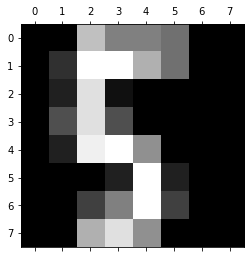

5


In [5]:
import matplotlib.pyplot as plt 

plt.gray()
plt.matshow(digits.images[25]) 
plt.show()
print(digits.target[25])

A função PCA importada de dentro do scikit-learn depende basicamente do atributo n_components. Esse atributo pode ser especificado como um inteiro, onde descreverá o número de componentes desejado, ou um valor contínuo entre 0 e 1, indicando o percentual de variância que deseja ser mantido no resultado final. O parâmetro whiten realiza uma operação matemática no sinal dos vetores extraídos no processo do PCA, e pode melhorar o resultado.

In [13]:
pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_pca.shape[1])

Número original de atributos: 64
Número reduzido de atributos: 29


## Regressão Logística

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

#######

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados reduzidos (PCA em tudo):', accuracy_score(y_test, y_pred))

#######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pca = PCA(n_components=0.95, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais (PCA da parte certa):', accuracy_score(y_test, y_pred))

Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados reduzidos (PCA em tudo): 0.9629629629629629
Acurácia nos dados originais (PCA da parte certa): 0.9612794612794613


### Seleção de atributos

A seleção de atributos não é um processo não-supervisionado, igual a redução de dimensionalidade. É feita uma análise diretamente relacionada com o rótulo da amostra, portanto é supervisionado. Uma das estratégias mais comuns de seleção de atributos é teste de valor ANOVA. Esse teste identifica se existe algum valor significamente diferente da relação entre atributo e rótulo. Os atributos que são muito diferentes nessa relação, podem ser descartados.

Lembrando sempre de não dar informações do teste para a seleção de atributos, para não virar um tipo de trapaça.

Número original de atributos: 64
Número reduzido de atributos: 29
[2, 5, 10, 13, 18, 19, 20, 21, 26, 27, 28, 29, 30, 33, 34, 35, 36, 38, 42, 43, 44, 46, 50, 53, 54, 58, 60, 61, 62]


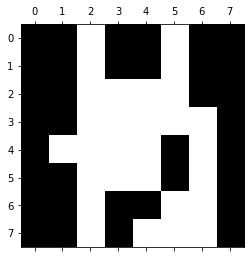

Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9444444444444444


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np

import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fvalue_selector = SelectKBest(f_classif, k=29)
X_kbest = fvalue_selector.fit_transform(X_train, y_train)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_kbest.shape[1])

###

selected_features = []
map_vector = []
mask = fvalue_selector.get_support()
for m, feature in zip(mask, list(range(64))):
    if m:
        selected_features.append(feature)
        map_vector.append(1)
    else:
        map_vector.append(0)

print(selected_features)

map_vector = np.asarray(map_vector)

plt.matshow(map_vector.reshape(8,8)) 
plt.show()

###

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(X_kbest, y_train)
X_test_kbest = fvalue_selector.transform(X_test)
y_pred = model.predict(X_test_kbest)
print('Acurácia nos dados Kbest:', accuracy_score(y_test, y_pred))

Os resultados devem ser comparados entre a acurácia nos dados originais e a acurácia com a redução de dimensionalidade ou com a seleção dos atributos. Além de olhar para os resultados também é importante notar a redução de dimensionalidade, já que isso pode levar a processos mais rápidos.

## Exercícios

(1) Explore as configurações do PCA, utilizando números fixos de componentes e outros valores contínuos para a variância, e verifique se é possível obter melhores resultados utilizando a regressão logística e a separação de dados da forma como está.

In [77]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

acc_pca = []

#-------- Modelo Regressão Logística Original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)

lst = [.95,.96,.97,.98,.99]
for n in lst:
    
    print('para N:',n)

    #-------- Visualização redução PCA
    pca = PCA(n_components=n, whiten=True)
    X_pca = pca.fit_transform(X)

    print('Número original de atributos:', X.shape[1])
    print('Número reduzido de atributos:', X_pca.shape[1])

    #-------- Modelo Regressão Logística PCA
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Acurácia nos dados PCA:', accuracy_score(y_test, y_pred))
    acc_pca.append(accuracy_score(y_test, y_pred))
    print('Acurácia nos dados originais:', acc_original)
    print('')

para N: 0.95
Número original de atributos: 64
Número reduzido de atributos: 29
Acurácia nos dados PCA: 0.9612794612794613
Acurácia nos dados originais: 0.9730639730639731

para N: 0.96
Número original de atributos: 64
Número reduzido de atributos: 31
Acurácia nos dados PCA: 0.968013468013468
Acurácia nos dados originais: 0.9730639730639731

para N: 0.97
Número original de atributos: 64
Número reduzido de atributos: 34
Acurácia nos dados PCA: 0.968013468013468
Acurácia nos dados originais: 0.9730639730639731

para N: 0.98
Número original de atributos: 64
Número reduzido de atributos: 37
Acurácia nos dados PCA: 0.9663299663299664
Acurácia nos dados originais: 0.9730639730639731

para N: 0.99
Número original de atributos: 64
Número reduzido de atributos: 41
Acurácia nos dados PCA: 0.9730639730639731
Acurácia nos dados originais: 0.9730639730639731



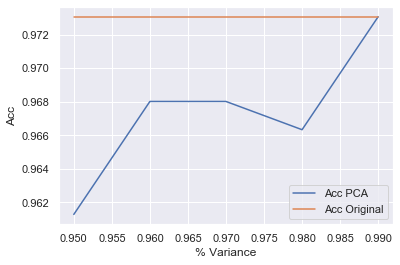

In [78]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plot_x = lst # valores que vão no eixo X
plot_y = acc_pca # valores que vão no eixo Y
    
ax = sns.lineplot(x=np.array(plot_x),y=np.array(plot_y),label='Acc PCA')
ax = sns.lineplot(x=np.array(plot_x),y=acc_original,label='Acc Original')
ax.set_ylabel('Acc')
ax.set_xlabel('% Variance')
plt.legend()

In [79]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

acc_pca = []

#-------- Modelo Regressão Logística Original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)

lst = range(30,64,5)

for n in lst:
    
    print('para N:',n)

    #-------- Visualização redução PCA
    pca = PCA(n_components=n, whiten=True)
    X_pca = pca.fit_transform(X)

    print('Número original de atributos:', X.shape[1])
    print('Número reduzido de atributos:', X_pca.shape[1])

    #-------- Modelo Regressão Logística PCA
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Acurácia nos dados PCA:', accuracy_score(y_test, y_pred))
    acc_pca.append(accuracy_score(y_test, y_pred))
    print('Acurácia nos dados originais:', acc_original)
    print('')

para N: 30
Número original de atributos: 64
Número reduzido de atributos: 30
Acurácia nos dados PCA: 0.9595959595959596
Acurácia nos dados originais: 0.9730639730639731

para N: 35
Número original de atributos: 64
Número reduzido de atributos: 35
Acurácia nos dados PCA: 0.9713804713804713
Acurácia nos dados originais: 0.9730639730639731

para N: 40
Número original de atributos: 64
Número reduzido de atributos: 40
Acurácia nos dados PCA: 0.9696969696969697
Acurácia nos dados originais: 0.9730639730639731

para N: 45
Número original de atributos: 64
Número reduzido de atributos: 45
Acurácia nos dados PCA: 0.9663299663299664
Acurácia nos dados originais: 0.9730639730639731

para N: 50
Número original de atributos: 64
Número reduzido de atributos: 50
Acurácia nos dados PCA: 0.9612794612794613
Acurácia nos dados originais: 0.9730639730639731

para N: 55
Número original de atributos: 64
Número reduzido de atributos: 55
Acurácia nos dados PCA: 0.9612794612794613
Acurácia nos dados originais: 

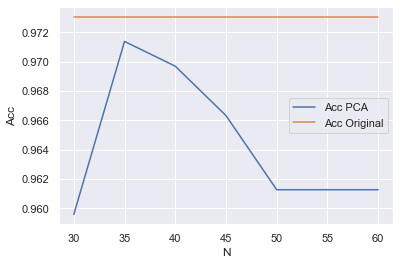

In [80]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plot_x = lst # valores que vão no eixo X
plot_y = acc_pca # valores que vão no eixo Y
    
ax = sns.lineplot(x=np.array(plot_x),y=np.array(plot_y),label='Acc PCA')
ax = sns.lineplot(x=np.array(plot_x),y=acc_original,label='Acc Original')
ax.set_ylabel('Acc')
ax.set_xlabel('N')
plt.legend()

(2) Explore o número de atributos na função KBest, variando sistematicamente, para provar que há ou não há um resultado melhor.

In [81]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

acc_kbest = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)

lst = range(30,64,5)
for n in lst:
    
    print('para N:',n)
    
    fvalue_selector = SelectKBest(f_classif, k=n)
    X_kbest = fvalue_selector.fit_transform(X_train, y_train)

    print('Número original de atributos:', X.shape[1])
    print('Número reduzido de atributos:', X_kbest.shape[1])

    #---------- Modelo Kbest

    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
    model.fit(X_kbest, y_train)
    X_test_kbest = fvalue_selector.transform(X_test)
    y_pred = model.predict(X_test_kbest)
    
    print('Acurácia nos dados originais:', acc_original)
    print('Acurácia nos dados Kbest:', accuracy_score(y_test, y_pred))
    print('')
    
    acc_kbest.append(accuracy_score(y_test, y_pred)) 

para N: 30
Número original de atributos: 64
Número reduzido de atributos: 30
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9461279461279462

para N: 35
Número original de atributos: 64
Número reduzido de atributos: 35
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9528619528619529

para N: 40
Número original de atributos: 64
Número reduzido de atributos: 40
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9629629629629629

para N: 45
Número original de atributos: 64
Número reduzido de atributos: 45
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9663299663299664

para N: 50
Número original de atributos: 64
Número reduzido de atributos: 50
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9730639730639731

para N: 55
Número original de atributos: 64
Número reduzido de atributos: 55
Acurácia nos dados originais: 0.9730639730639731
Acurácia nos d

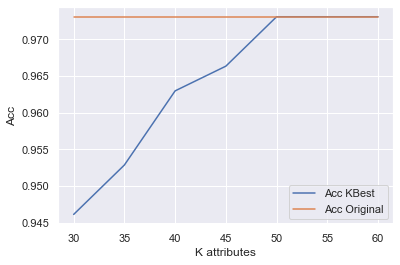

In [82]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plot_x = lst # valores que vão no eixo X
plot_y = acc_kbest # valores que vão no eixo Y
    
ax = sns.lineplot(x=np.array(plot_x),y=np.array(plot_y),label='Acc KBest')
ax = sns.lineplot(x=np.array(plot_x),y=acc_original,label='Acc Original')
ax.set_ylabel('Acc')
ax.set_xlabel('K attributes')
plt.legend()